# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)
data.index = data.index.to_period("Y")

In [2]:
# Preview the dataset
data

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6
1924,47.6
1928,47.8
1932,46.2
1936,46.5


Plot this time series data. 

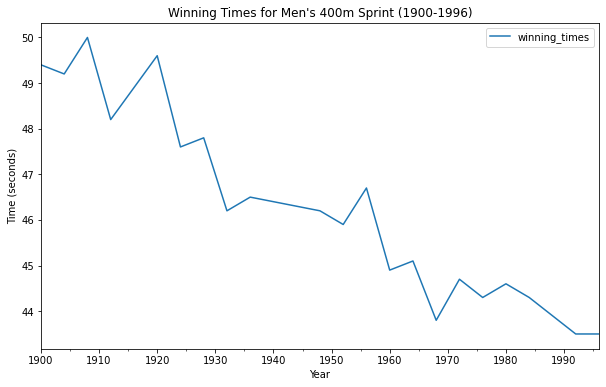

In [3]:
# Plot the time series
data.plot(figsize=(10, 6))
plt.title('Winning Times for Men\'s 400m Sprint (1900-1996)')
plt.xlabel('Year')
plt.ylabel('Time (seconds)')
plt.show()


If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [4]:
# Difference the time series
data_diff = data.diff().dropna()
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

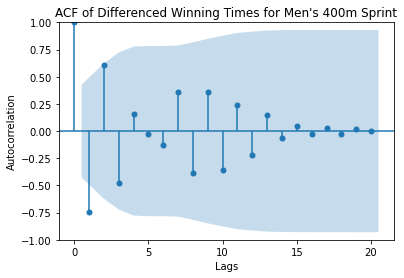

In [6]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_diff, lags=20)
plt.title('ACF of Differenced Winning Times for Men\'s 400m Sprint')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

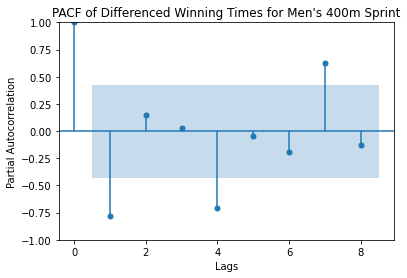

In [10]:
# Plot the PACF
plot_pacf(data_diff, lags=8)
plt.title('PACF of Differenced Winning Times for Men\'s 400m Sprint')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()


Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARMA(1,1) model
model_arma11 = ARIMA(data, order=(1,0,1)).fit()
print("ARMA(1,1) model:")
print(model_arma11.summary())
print("AIC:", model_arma11.aic)
print("BIC:", model_arma11.bic)



ARMA(1,1) model:
                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   22
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -29.390
Date:                Sun, 12 Mar 2023   AIC                             66.780
Time:                        23:30:03   BIC                             71.144
Sample:                    12-31-1900   HQIC                            67.808
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3916      2.448     18.948      0.000      41.593      51.190
ar.L1          0.9723      0.080     12.224      0.000       0.816       1.128
ma.L1         -0.3045      0.286   

ARMA(1,1) model has an AIC of 66.78 and a BIC of 71.14. The parameter estimates are also significant at the 5% level, except for the MA parameter which has a p-value of 0.286. The Ljung-Box test for residual autocorrelation is also insignificant, suggesting that the model adequately captures the autocorrelation in the data.

Overall, this is a good model fit for the winning times data.

In [12]:
# Fit ARMA(2,2) model
model_arma22 = ARIMA(data, order=(2,0,2)).fit()
print("ARMA(2,2) model:")
print(model_arma22.summary())
print("AIC:", model_arma22.aic)
print("BIC:", model_arma22.bic)

ARMA(2,2) model:
                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   22
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -22.704
Date:                Sun, 12 Mar 2023   AIC                             57.408
Time:                        23:30:13   BIC                             63.954
Sample:                    12-31-1900   HQIC                            58.950
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2905      2.030     22.806      0.000      42.312      50.269
ar.L1          0.6340      0.288      2.203      0.028       0.070       1.198
ar.L2          0.2959      0.295   

## What is your final model? Why did you pick this model?

Based on the AIC and BIC values, the ARMA(1,1) model seems to be a better fit for the data compared to the ARMA(2,2) model. Also, the p-value for the MA(1) coefficient in the ARMA(1,1) model is less than 0.05, indicating that the parameter estimate is significant. Therefore, we can choose the ARMA(1,1) model as our final model for the given time series.

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 